In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load the feature-engineered data
df = pd.read_csv(r'C:\Users\HP\Desktop\Incident-Response-Dashboard\data\feature_engineered_incident_data.csv')

In [36]:
df.head()

,Unnamed: 0,timestamp,protocol,port,attack_type,severity,event_type,hour,day_of_week,day,month,attack_type_encoded,event_type_encoded,protocol_encoded,severity_rolling_avg,lag_1_attack_type,lag_2_attack_type
0,0,2025-04-21 12:01:42.053741,TCP,7711,Normal,1.63,File Transfer,12,0,21,4,3,1,1,0.716667,3.0,3.0
1,1,2025-04-21 12:02:40.053741,UDP,614,Normal,0.03,File Transfer,12,0,21,4,3,1,2,0.716667,3.0,3.0
2,2,2025-04-21 12:03:30.053741,TCP,3539,Normal,0.49,File Transfer,12,0,21,4,3,1,1,0.716667,3.0,3.0
3,3,2025-04-21 12:02:36.053741,TCP,1466,Normal,1.33,Login,12,0,21,4,3,2,1,0.616667,3.0,3.0
4,4,2025-04-21 12:02:30.053741,UDP,7847,Normal,1.07,Login,12,0,21,4,3,2,2,0.963333,3.0,3.0


In [37]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'protocol', 'port', 'attack_type',
       'severity', 'event_type', 'hour', 'day_of_week', 'day', 'month',
       'attack_type_encoded', 'event_type_encoded', 'protocol_encoded',
       'severity_rolling_avg', 'lag_1_attack_type', 'lag_2_attack_type'],
      dtype='object')

In [38]:
df = df.drop(['timestamp', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], axis=1, errors='ignore')

In [39]:
# Ensure all data is of the correct data type
df['port'] = df['port'].astype('float32')  # Make sure 'port' is numeric
df['severity'] = df['severity'].astype('float32')  # Make sure 'severity' is numeric

In [40]:
# Identify all categorical columns and encode them
categorical_columns = ['protocol', 'event_type', 'attack_type']  # List your categorical columns here

label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [41]:
# Prepare data for LSTM
X = df.drop(['attack_type_encoded'], axis=1).values  # Drop the target column from features
y = df['attack_type_encoded'].values  # Target column

In [42]:
# Scale the features to ensure LSTM performs better (Min-Max Scaling)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
# Reshape the data for LSTM (3D array: [samples, time steps, features])
X_scaled_reshaped = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

In [44]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_reshaped, y, test_size=0.2, shuffle=False)

In [45]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))  # Output layer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')  # Change loss function to sparse_categorical_crossentropy for multi-class classification

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
# Check the unique values in the target column
print(np.unique(y_train))

# Ensure that the number of output classes matches the target labels
num_classes = len(np.unique(y))  # Calculate number of unique classes
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(num_classes, activation='softmax'))  # Adjust output layer to have num_classes units
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

[0 1 2 3 4 5]
Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6963 - loss: 1.3268
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7721 - loss: 0.6235
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8655 - loss: 0.3611
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8985 - loss: 0.2950
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9206 - loss: 0.2341
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9519 - loss: 0.2056
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9694 - loss: 0.1770
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9746 - loss: 0.1565
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9823 - loss: 0.1291
Epoch 10/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9836 - loss: 0.1148
Epoch 11/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9878 - loss: 0.0951
Epoch 12/20
250/250 ━━━━━━━━━━━━━━━━━━

In [47]:
# Predictions
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


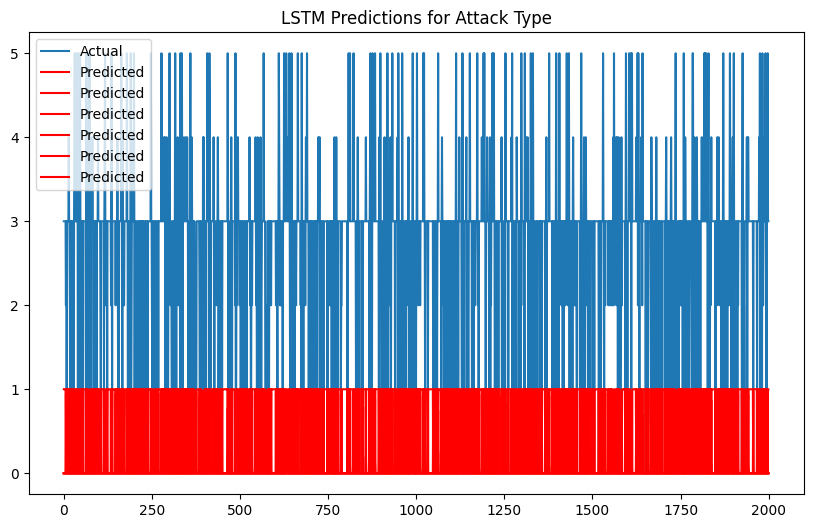

In [48]:
# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted', color='red')
plt.legend()
plt.title("LSTM Predictions for Attack Type")
plt.show()

LSTM MAE: 0.001
LSTM Accuracy: 0.999
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       218
           2       1.00      1.00      1.00       109
           3       1.00      1.00      1.00      1385
           4       0.98      1.00      0.99        93
           5       1.00      0.98      0.99        97

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[  98    0    0    0    0    0]
 [   0  218    0    0    0    0]
 [   0    0  109    0    0    0]
 [   0    0    0 1385    0    0]
 [   0    0    0    0   93    0]
 [   0    0    0    0    2   95]]


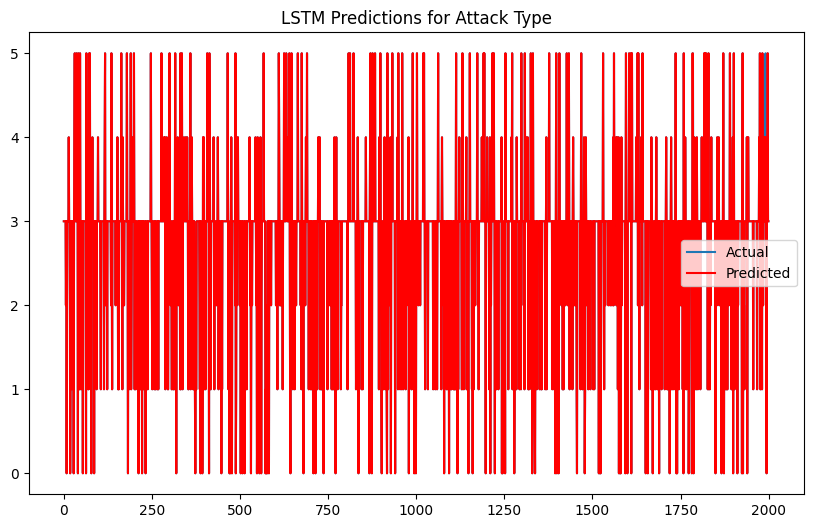

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error
import numpy as np

# Convert predicted probabilities to class labels
y_pred_class = np.argmax(y_pred, axis=1)  # Convert softmax outputs to class labels

# Evaluate LSTM model using various metrics
lstm_mae = mean_absolute_error(y_test, y_pred_class)
print("LSTM MAE:", lstm_mae)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred_class)
print("LSTM Accuracy:", accuracy)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_class))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:\n", conf_matrix)

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_class, label='Predicted', color='red')
plt.legend()
plt.title("LSTM Predictions for Attack Type")
plt.show()